# `Importing Libraries `

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from collections import Counter

## Helper Functions


In [24]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    

## **preprocessing the dataset**

In [25]:
df = pd.read_csv("creditcard.csv")
df2 = pd.read_csv("iris.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
target = df.iloc[:,-1]
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

target
Y


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## **Splitting dataset into training and test**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

 ## Showing imbalance in class

0    284315
1       492
Name: Class, dtype: int64


99.82725143693798

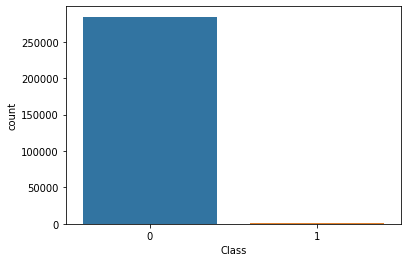

In [28]:
ax = sns.countplot(x=target,data=df)
print(target.value_counts())

# percentage in 1
100* (492/float(df.shape[0]))

# percentage in 0
100* (284315/float(df.shape[0]))

## Running logistic regression
***

In [29]:
clf = LogisticRegression().fit(X_train,Y_train)
Y_Test_Pred = clf.predict(X_test)


/Users/sarthakpunjabi/Desktop/machine learning and data science/data_with_python/env1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Getting reports from the model**

Accuracy =  0.9989041037590305
Precision =  0.6666666666666666
Recall =  0.6174496644295302
F1 Score =  0.6411149825783973


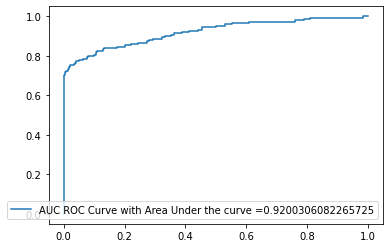

In [30]:
generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)


## `Under sampling`


In [31]:
minority_class_len = len(df[df[target] == 1])

majority_class_indices = df[df[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)

minority_class_indices = df[df[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = df.loc[under_sample_indices]
sns.countplot(x=target, data=under_sample)

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n           dtype='int64', length=284807)] are in the [columns]"

## `Running model again with penalize algorithm `

In [ ]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression(penalty='l2').fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)


/Users/sarthakpunjabi/Desktop/machine learning and data science/data_with_python/env1/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/sarthakpunjabi/Desktop/machine learning and data science/data_with_python/env1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9384615384615385
Precision =  0.9736842105263158
Recall =  0.9024390243902439
F1 Score =  0.9367088607594938


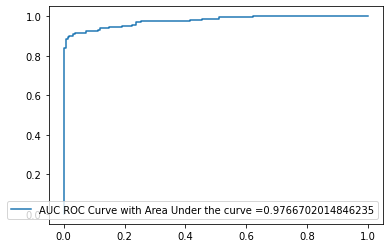

In [ ]:
generate_auc_roc_curve(clf, X_test)

## **`Over sampling smote`**

In [ ]:
# unique_classes = list(df[target].unique())
# unique_classes
# out_dict = {}
# for classes in unique_classes:
#     out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
#                                      *len(unique_classes))
# clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)
# class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])
# Y_Test_Pred = clf.predict(X_test)
# pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])
# generate_model_report(Y_test, Y_Test_Pred)
# generate_auc_roc_curve(clf, X_test)

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled , Y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)


[('Class', 1)] (984, 1)


## `using smote` 

In [ ]:
# unique, count = np.unique(Y_train, return_counts=True)
# Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
# Y_train_dict_value_count

{0: 331, 1: 328}